### ANALISIS SENTIMEN ULASAN TRIPADVISOR METODE SVM

In [ ]:
# Import Library
import pandas as pd

In [ ]:
# Import Data
data = pd.read_excel('Review Sudah Label Indo.xlsx')
data

,Review,Label
0,benarbenar kunjung borobudur indah kuil kuil b...,Positif
1,orang candi borobudur salahsatu mahakarya ting...,Negatif
2,barang tinggal pangeran dipenogoro ruang simpa...,Positif
3,kuil borobadur bangun kesan layak kkunjung kui...,Positif
4,candi kagum sayang parkir mahal transportasi k...,Negatif
...,...,...
3897,view gunung sohor gunung lingkar magelang view...,Positif
3898,pandang bagus dikentinggian jalur cepat butuh ...,Positif
3899,ketep pas puncak panca arga panca arga gunung ...,Positif
3900,lokasi kenal kalang nikmat sun rise datar mili...,Positif


In [ ]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns
# Menampilkan Jumlah Label Sentimen
temp = data.groupby('Label').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Label,Review
2,Positif,3301
0,Negatif,370
1,Netral,231


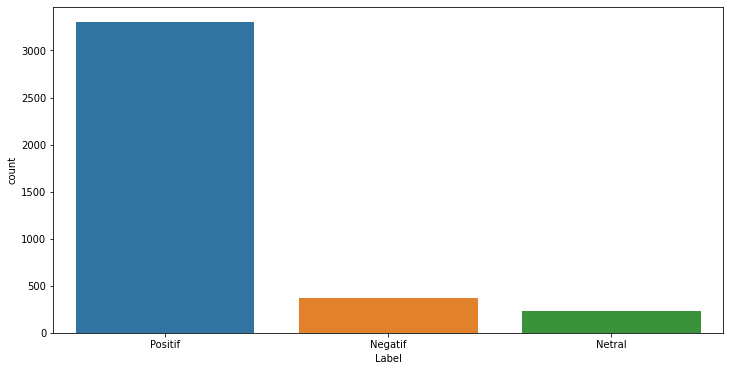

In [ ]:
# Menampilkan Jumlah Label Sentimen dalam bentuk Grafik BAR
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=data)

In [ ]:
# Menampilkan Jumlah Label Sentimen Dalam Bentuk Grafik Pie
import plotly.express as px
fig = px.pie(data, names='Label', title = 'Persentase Label Sentiment')
fig.show()

#### Kategorisasi Data
Sebelum perhitungan TF-IDF, terlebih dahulu kita kategorikan data.
 - Kolom Label = Kategori
 - Kolom Review = String

In [ ]:
# Kategorisasi Data
data = data.astype({'Label' : 'category'})
data = data.astype({'Review' : 'string'})
data.dtypes

Review      string
Label     category
dtype: object

#### Perhitungan TF-IDF
Algoritma TF-IDF (Term Frequency – Inverse Document Frequency) adalah salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Contoh yang dibahas kali ini adalah mengenai penentuan urutan peringkat data berdasarkan query yang digunakan.
Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus TF = jumlah frekuensi kata terpilih / jumlah kata dan nilai IDF dihitung dengan rumus IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih). Selanjutnya adalah melakukan perkalian antara nilai TF dan IDF untuk mendapatkan jawaban akhir.

In [ ]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Perhitungan TF
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Review'].astype('U'))
#Perhitungan TF-IDF
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Review'].astype('U'))
print(text_tf)

  (0, 4049)	0.45987681455899665
  (0, 5259)	0.1663678884482136
  (0, 6325)	0.3570449725251731
  (0, 5115)	0.5130819514017309
  (0, 5021)	0.20173901354223442
  (0, 1432)	0.24395465845091807
  (0, 3470)	0.15748257913028527
  (0, 846)	0.24395465845091807
  (0, 3636)	0.30572041211380235
  (0, 2681)	0.14141152451040265
  (0, 990)	0.11785493446890878
  (0, 3660)	0.1471829712222325
  (0, 736)	0.19120380369242188
  (1, 4034)	0.10354714907567962
  (1, 3421)	0.17218310207518167
  (1, 6667)	0.15729825545212894
  (1, 249)	0.19782248585329149
  (1, 3005)	0.11200121766639669
  (1, 7323)	0.18684204708809452
  (1, 3900)	0.15608988191956297
  (1, 1460)	0.13551814334893536
  (1, 2877)	0.16363225955534505
  (1, 4212)	0.0866748067712741
  (1, 885)	0.11332488876084391
  (1, 3078)	0.11660606087122859
  :	:
  (3901, 2352)	0.20335282440878447
  (3901, 7822)	0.12007673947902357
  (3901, 5711)	0.18752549288183318
  (3901, 1496)	0.15854995320292578
  (3901, 6499)	0.1262949143282724
  (3901, 7630)	0.1352147802744

In [ ]:
# Melihat Hasil Letak Sebuah Kata
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aa',
 'aaah',
 'aad',
 'aadc',
 'aaja',
 'abad',
 'abadi',
 'abai',
 'abdi',
 'abis',
 'absolut',
 'absorbir',
 'abu',
 'abuabu',
 'ac',
 'acak',
 'acara',
 'accra',
 'activity',
 'acu',
 'acung',
 'ada',
 'adaaa',
 'adaah',
 'adab',
 'adakan',
 'adalh',
 'adalha',
 'adameski',
 'adan',
 'adap',
 'adaptasi',
 'adat',
 'additional',
 'adegan',
 'adek',
 'adeke',
 'adem',
 'adha',
 'adi',
 'adik',
 'adil',
 'adipura',
 'adisucipto',
 'adlah',
 'administratif',
 'adopsi',
 'adrenalin',
 'ads',
 'adu',
 'aduhai',
 'aduk',
 'adventerous',
 'adventure',
 'adzan',
 'adzka',
 'aerobik',
 'aerowisata',
 'aesthetics',
 'afdhol',
 'afdol',
 'affandi',
 'afrika',
 'after',
 'aga',
 'agam',
 'agama',
 'agamasebenarnya',
 'agen',
 'agency',
 'agenda',
 'agengantungankuncisnackmagelang',
 'agengantungankunciunikmagelang',
 'agengantungankunimagelang',
 'agengrosirgantungankunciakrilikmagelang',
 'agengrosirgantungankuncianimemurahmagelang',
 'agengrosirgantungankuncibonekamagelang',
 'agengrosirgan

In [ ]:
# Melihat hasil kalkulasi dari TF-IDF dalam sebuah kata
text_tf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Ubah Data TF-IDF ke dalam bentuk DataFrame
df = pd.DataFrame(text_tf.todense().T,
                  index=vectorizer.get_feature_names(),
                  columns=[f'D{i+1}' for i in range(len(data))])
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D3893,D3894,D3895,D3896,D3897,D3898,D3899,D3900,D3901,D3902
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aadc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaja,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuckerberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split Validation
Split Validation adalah teknik validasi
yang membagi data menjadi dua bagian secara acak,
sebagian sebagai data training dan sebagian lainnya
sebagai data testing. Dengan menggunakan Split
Validation akan dilakukan percobaan training
berdasarkan split ratio yang telah ditentukan
sebelumnya, untuk kemudian sisa dari split ratio
data training akan dianggap sebagai data testing.
Data training adalah data yang akan dipakai dalam
melakukan pembelajaran sedangkan data testing
adalah data yang belum pernah dipakai sebagai
pembelajaran dan akan berfungsi sebagai data
pengujian kebenaran atau keakurasian hasil
pembelajaran. Namun disini kami split data training 0.9 (90%) dan data testing 0.1(10%)

In [ ]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Label'], test_size=0.1, random_state=33)
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (3511, 7891)
X_test_shape :  (391, 7891)
y_train_shape :  (3511,)
y_test_shape :  (391,)


#### Parameter Turning Metode SVM
Hyperparameter  Tuning adalah  proses  pemilihan parameter terbaik  untuk  algoritma pembelajaran.   Salah   satu   untuk   menentukan   kombinasi Hyperparameter adalah   dengan menggunakan GridSearch. grid search adalah suatu cara untuk menemukan parameter terbaik yang digunakan untuk modeling dalam machin learning. Apabila kita memakai grid search ini kita bisa mencari mana hyperparameter terbaik yang hendak kita gunakan untuk modeling di suatu algoritma machine learning.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Membuat sebuah parameters dengan masing-masing jenis kernel, nilai C dan nilai Gamma
parameters = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

Dari hasil parameter turning dengan GridSearch. bahwa Kernel terbaik adalah "rbf", C terbaik adalah 10, dan nilai gamma terbaik adalah 0.1. sehingga menghasilkan score 0.87 (87%)

In [ ]:
# Menampilkan jenis Kernel, Nilai C dan Nilai Gamma terbaik (Best_Score)
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
  print(f'\t{param}: {best_params[param]}')

Best Score: 0.8706917443759549
Best Parameters:
	kernel: rbf
	C: 10
	gamma: 0.1


#### Evaluasi Model SVM

In [ ]:
from sklearn.metrics import classification_report
# Evaluasi hasil
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.62      0.28      0.38        36
      Netral       1.00      0.12      0.21        25
     Positif       0.87      0.98      0.93       330

    accuracy                           0.86       391
   macro avg       0.83      0.46      0.51       391
weighted avg       0.86      0.86      0.83       391



In [ ]:
# Hasil prediksi
print (y_pred)

['Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Negatif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Negatif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Posi

#### Confusion Matriks
Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui

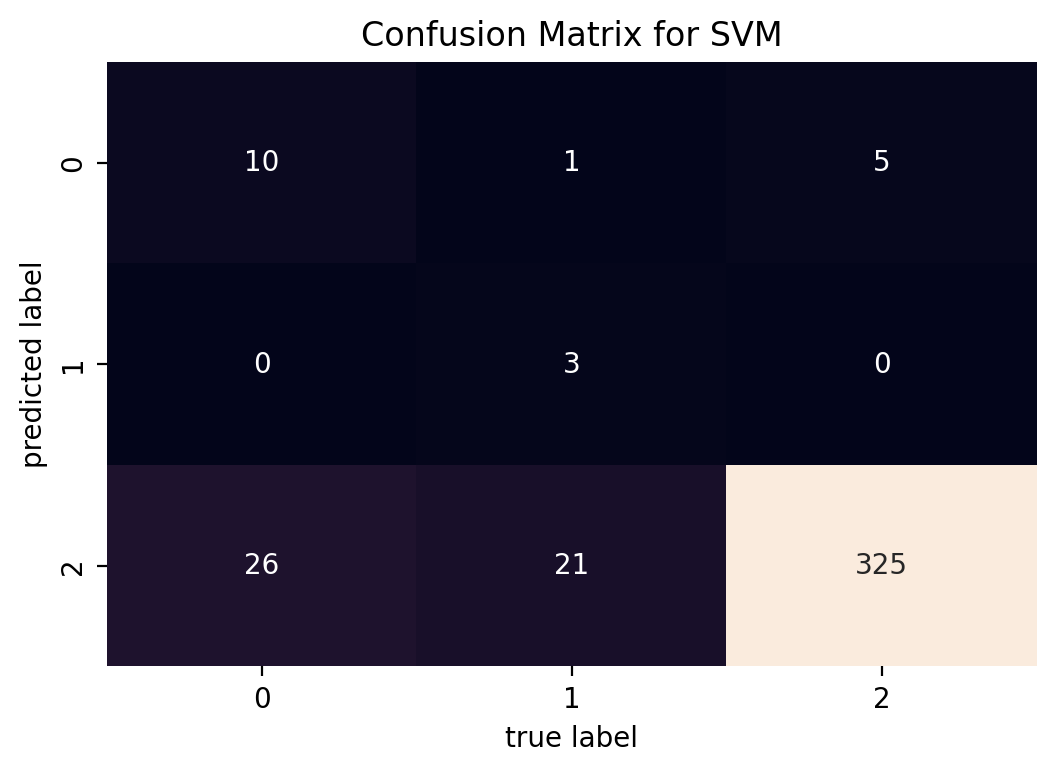

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=200)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for SVM')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### Testing Model SVM

In [ ]:
# Input kalimat teks
kalimat_tes = ["subhanallah, masjid yang sangat indah. tempat kita mendirikan sholat setelah adzan berkumandang. sempatkan waktu anda untuk beribadah." ]

In [ ]:
# definisikan nama label
nama_label = ["Positif","Negatif","Netral"]

In [ ]:
#Loop untuk prediksi
for teks in kalimat_tes:
    arr_teks = []
    arr_teks.append(teks)
    vektor = vectorizer.transform(arr_teks)
    prediksi_label_SVM= grid_search.predict(vektor)

In [ ]:
# Print hasil prediksi
prediksi_label_SVM

array(['Positif'], dtype=object)

#### WordCloud
wordcloud adalah gambar yang menunjukkan daftar kata-kata yang digunakan dalam sebuah teks, umumnya semakin banyak kata yang digunakan semakin besar ukuran kata tersebut dalam gambar.

##### 1. WordCloud Sentiment Negatif

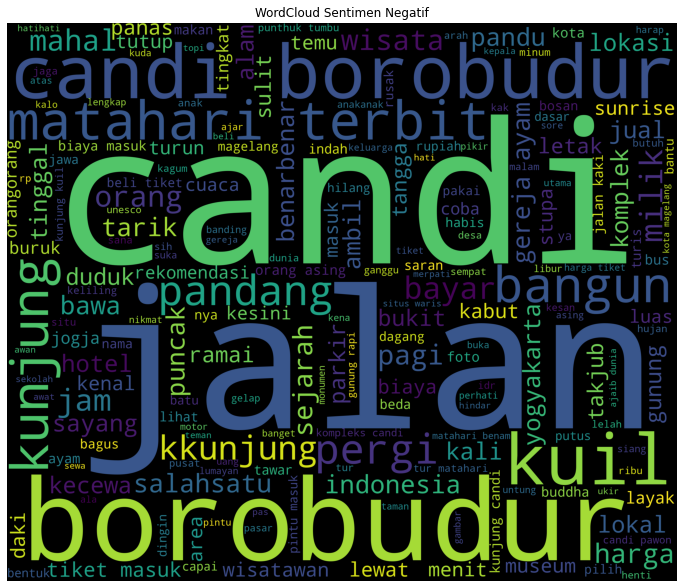

In [ ]:
# Import Library WordCloud
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
new_df=data[data['Label']=='Negatif']
words = ' '.join(new_df['Review'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(figsize=(12, 12))
plt.title("WordCloud Sentimen Negatif")
plt.savefig('WordCloud Sentimen Negatif.pdf')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 2. WordCloud Sentimen Netral

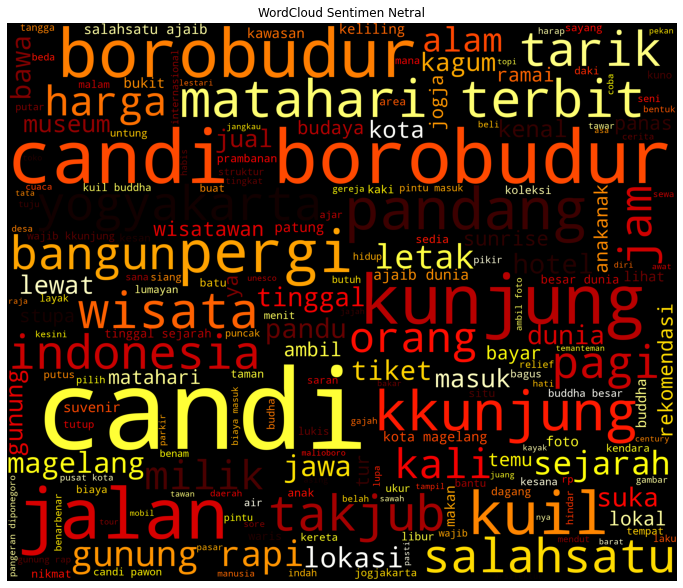

In [ ]:
# Import Library Wordcloud
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
new_df_net=data[data['Label']=='Netral']
words_net = ' '.join(new_df_net['Review'])
wordcloud = WordCloud(stopwords=STOPWORDS,colormap = 'hot',
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words_net)
plt.figure(figsize=(12, 12))
plt.title("WordCloud Sentimen Netral")
plt.savefig('WordCloud Sentimen Netral.png')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 3. WordCloud Sentimen Positive

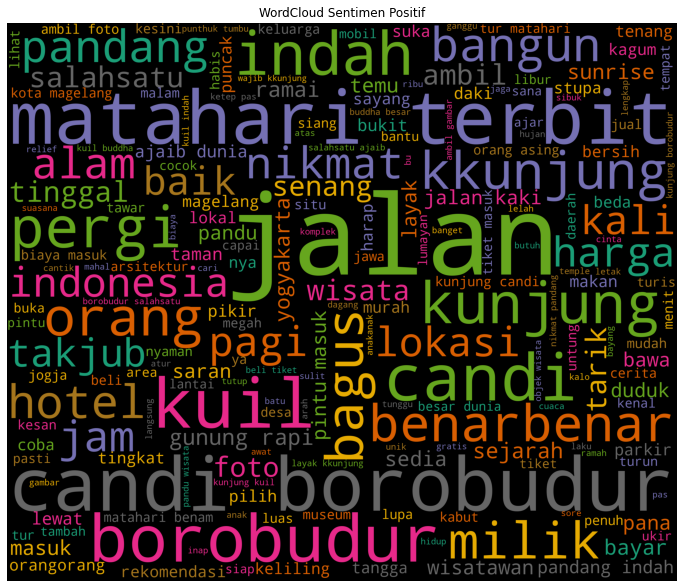

In [ ]:
# Import library Wordcloud
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
new_df_pos=data[data['Label']=='Positif']
words_pos = ' '.join(new_df_pos['Review'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black', colormap = 'Dark2',
                      width=3000,
                      height=2500
                     ).generate(words_pos)
plt.figure(figsize=(12, 12))
plt.title("WordCloud Sentimen Positif")
plt.savefig('WordCloud Sentimen Positif.png', format="png")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### WordCloud Semua kata, Baik itu Negatif, Netral ataupun Positif

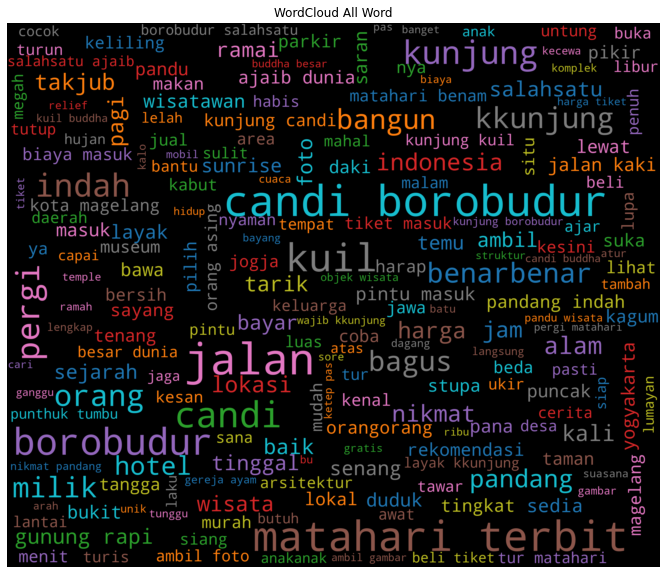

In [ ]:
allWords  = ' '.join( [str (twts) for twts in data['Review']])
wordCloud = WordCloud(width = 3000, height=2500, colormap = 'tab10', random_state=21, max_font_size=200).generate(allWords)
plt.figure(figsize=(12,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.title("WordCloud All Word")
plt.savefig('WordCloud All Word_1.png')
plt.axis('off')
plt.show()